# Enunciado

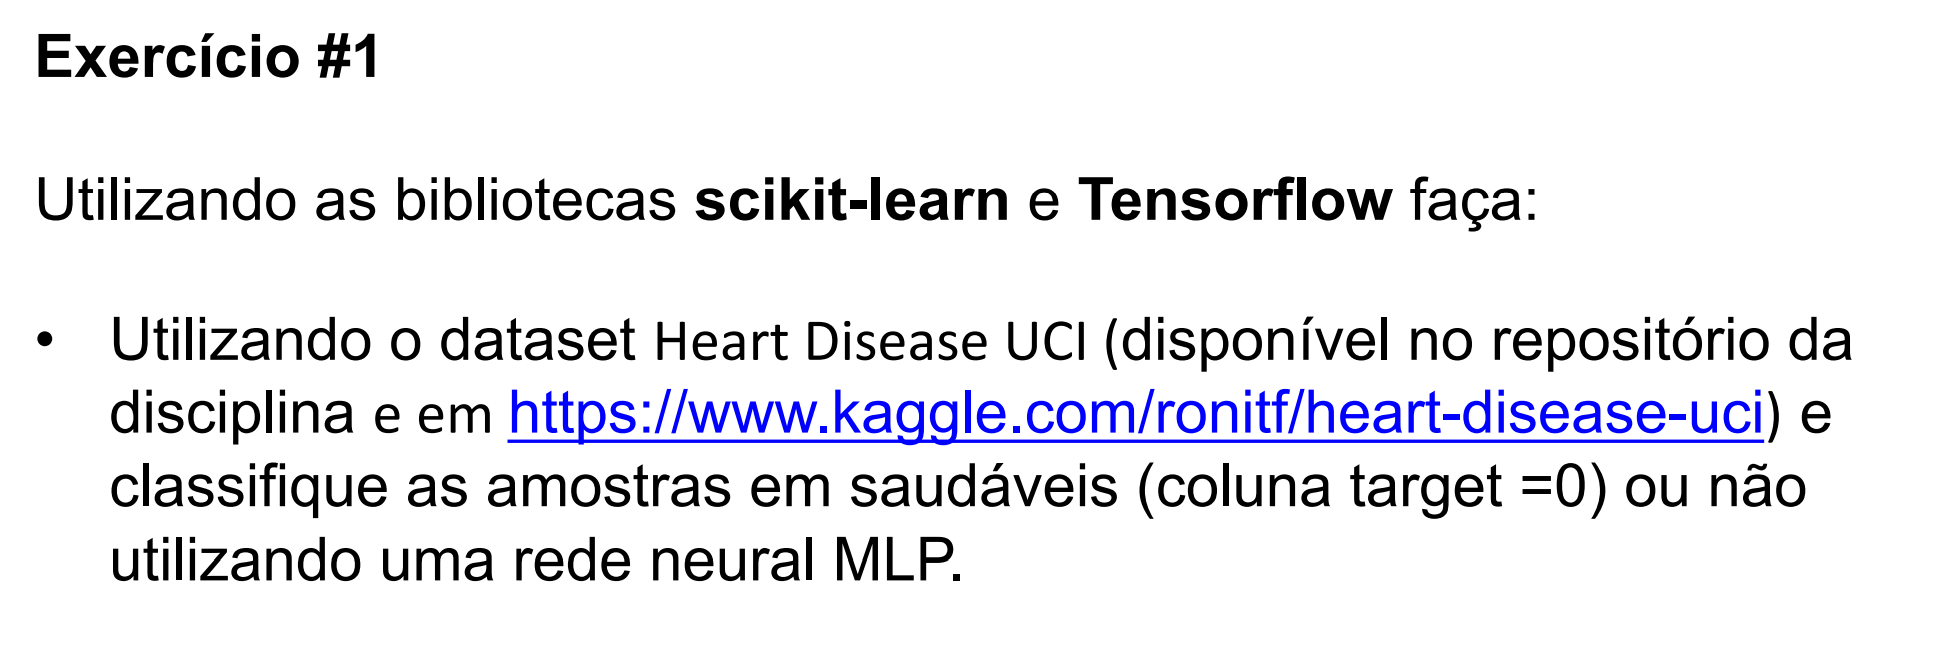

# Introdução

Fonte do enunciado não funcionou, achei a abaixo similar.

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## Descrição das colunas

**age**: (Age of the patient in years)

**sex**: (Male/Female)

**cp**: chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

**trestbps**: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

**chol**: (serum cholesterol in mg/dl)

**fbs**: (if fasting blood sugar > 120 mg/dl)

**restecg**: (resting electrocardiographic results): [normal, stt abnormality, lv hypertrophy]

**thalach**: maximum heart rate achieved

**exang**: exercise-induced angina (True/ False)

**oldpeak**: ST depression induced by exercise relative to rest

**slope**: the slope of the peak exercise ST segment

**ca**: number of major vessels (0-3) colored by fluoroscopy

**thal**: [normal; fixed defect; reversible defect]

**num**: the predicted attribute


## Comentários Iniciais

O dataset fornecido pelo professor já veio com o precesso de *Feature Engineering* executado.

Usei um seed de 42 para replicação dos resultados.

# Bibliotecas e Funções

In [187]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



In [188]:
import random

# Define a semente com o valor 42
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Código

In [189]:
df = pd.read_csv('https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/deep%20learning%20I/heart_disease_UCI/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [190]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Correlação

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

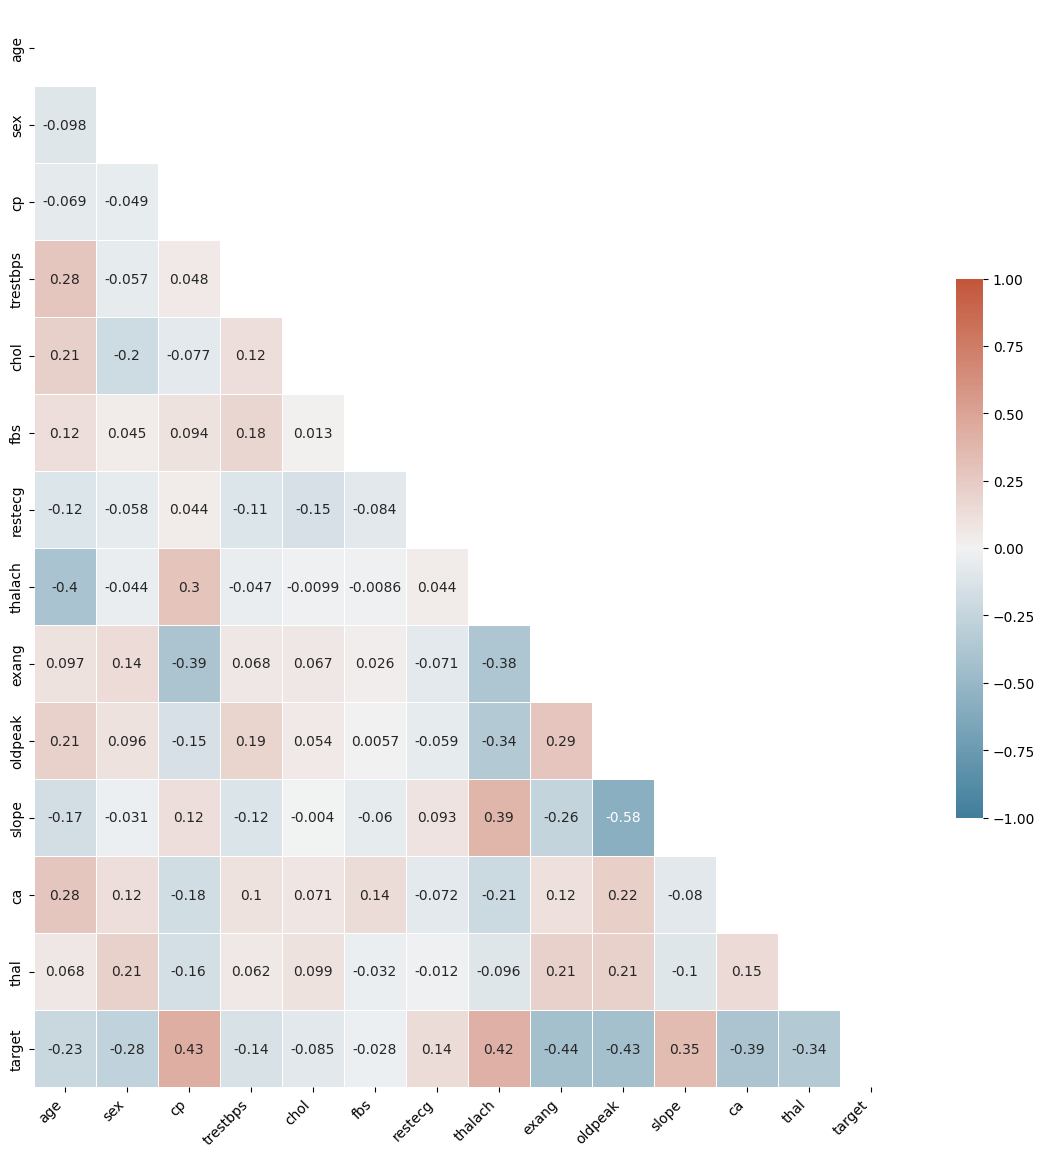

In [192]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (14, 14))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Nenhuma correlação expressiva em relação a variável target.

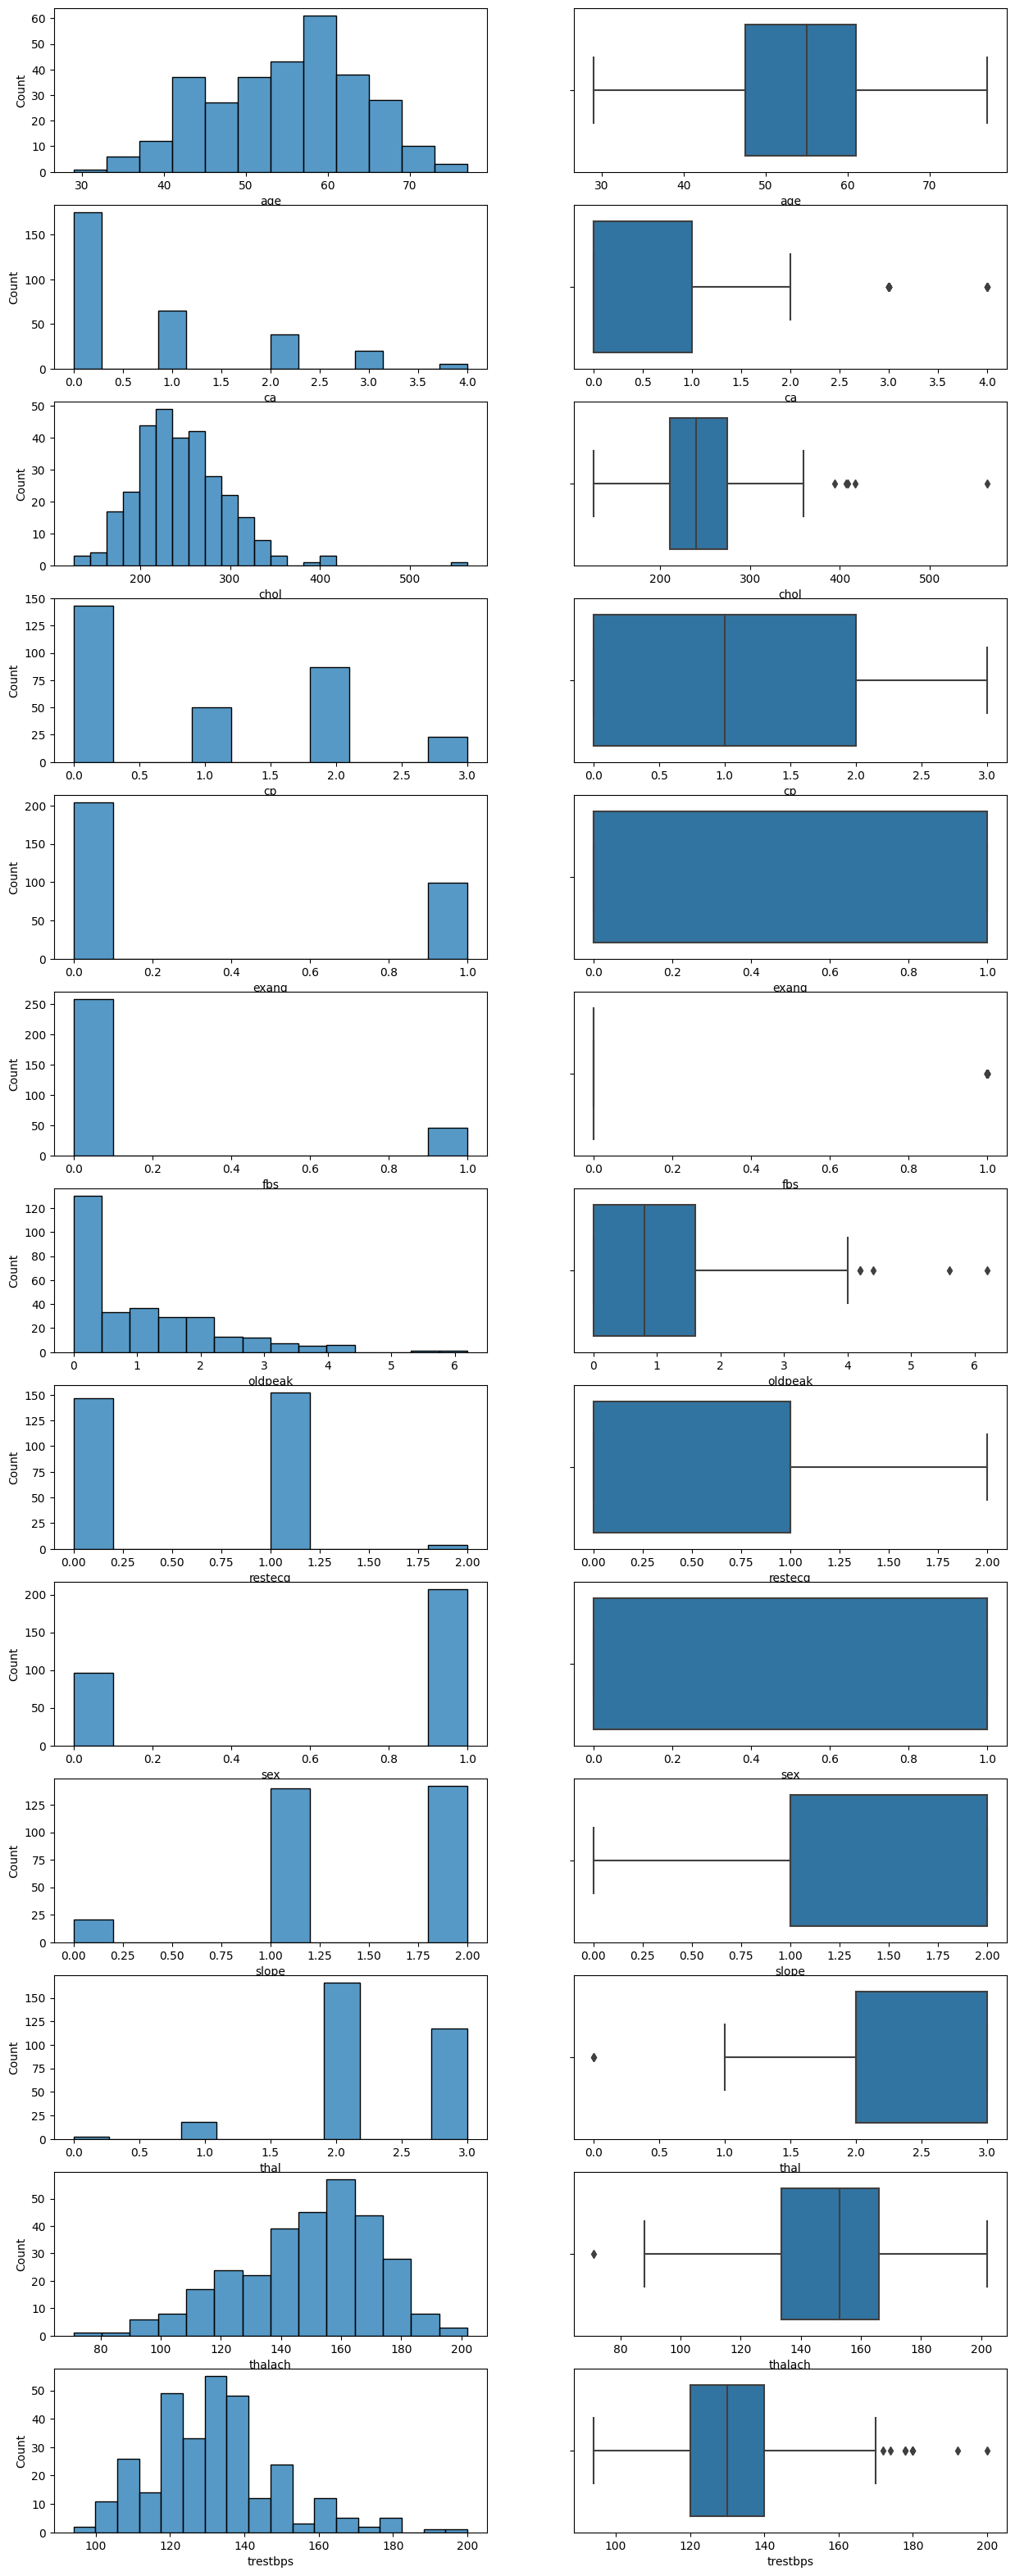

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [193]:
continous_features = list(set(df.columns) - set(['target']))
continous_features.sort()

fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(15, 40))
for i in range(len(continous_features)):
    feature = continous_features[i]
    plt.figure(figsize = (5, 5))
    data=df.copy()
    sns.histplot(x=data[feature].dropna(), ax=axes[i][0])
    sns.boxplot(x=data[feature].dropna(), ax=axes[i][1])

## Split Train Test

In [194]:
# separa do dados em features e target
X = df.drop("target", axis=1)
y = df["target"]

# separa os dados de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Em seguida, padronizaremos os dados, mudando a escala através do StandardScaler.

*É possível ter resultados diferentes mudando o scaler.*

In [195]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [196]:
epochs = 100

## Modelo 1

In [197]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [198]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [199]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                896       
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [200]:
from tensorflow.keras.callbacks import EarlyStopping

# callbacks
earlystopper = EarlyStopping(monitor='val_loss',patience=10)
callbacks = [earlystopper]

# treinando o modelo
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - 1s 38ms/step - loss: 0.7715 - accuracy: 0.4008 - val_loss: 0.7371 - val_accuracy: 0.5410
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6766 - accuracy: 0.5950 - val_loss: 0.6501 - val_accuracy: 0.6885
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6051 - accuracy: 0.7397 - val_loss: 0.5877 - val_accuracy: 0.7213
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.5505 - accuracy: 0.7851 - val_loss: 0.5352 - val_accuracy: 0.8033
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4996 - accuracy: 0.8347 - val_loss: 0.4919 - val_accuracy: 0.8197
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4556 - accuracy: 0.8430 - val_loss: 0.4579 - val_accuracy: 0.8197
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4174 - accuracy: 0.8512 - val_loss: 0.4309 - val_accuracy: 0.8197
Epoch 8/100
8/8 [===

### Conclusão parcial

O modelo obteve uma acurária de **86,89% de acurácia** sobre os dados de validação.

Mas como são muitas combinações possíveis na construção da arquitetura do modelo, a seguir vou utilizar o método de GridSearch para acha um modelo ótimo.

### GridSearchCV

In [201]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping

# definição do modelo
def create_model(num_layers=1, num_units=32, activation='relu'):
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# cria o 'empacotador'
model_wrapper = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# parametros do gridsearch
params = {'num_layers': [1, 2, 3], 
          'num_units': [16, 32, 64], 
          'activation': ['relu', 'tanh', 'sigmoid']}

# construção do gridsearch
grid = GridSearchCV(estimator=model_wrapper, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

# callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [earlystopper]

# fit the grid search
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks)

# summarize the results
print(f'Melhor Score: {grid_result.best_score_}\nParametros: {grid_result.best_params_}')


C:\Users\KValim\AppData\Local\Temp\ipykernel_20356\483016281.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)


Melhor Score: 0.8330882430076599
Parametros: {'activation': 'sigmoid', 'num_layers': 3, 'num_units': 16}


# Conclusão

Curiosamente o resultado do grid search foi inferior (**83,30%**) ao modelo construido a mão (**86,89%**), talvez tenha cometido algum erro na construção do grid.